In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Generate a random dataset
np.random.seed(42)  # For reproducibility
X = np.random.rand(1000, 5)  # 1000 samples, 5 features
y = 2 * X[:, 0] + 3 * X[:, 1] - X[:, 2] + np.random.normal(0, 0.1, 1000)  # Linear relation with noise

# Convert to Pandas DataFrame for easier handling
dataset = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
dataset['Target'] = y

# Save the dataset to a CSV file
dataset.to_csv('random_dataset.csv', index=False)
print("Dataset created and saved as 'random_dataset.csv'")

# Display a sample of the dataset
print("\nSample Data:")
print(dataset.head())  # Display first 5 rows


Dataset created and saved as 'random_dataset.csv'

Sample Data:
   Feature1  Feature2  Feature3  Feature4  Feature5    Target
0  0.374540  0.950714  0.731994  0.598658  0.156019  2.809532
1  0.155995  0.058084  0.866176  0.601115  0.708073 -0.618967
2  0.020584  0.969910  0.832443  0.212339  0.181825  2.077234
3  0.183405  0.304242  0.524756  0.431945  0.291229  0.846127
4  0.611853  0.139494  0.292145  0.366362  0.456070  1.403806


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('random_dataset.csv')

# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test))


C:\Users\91872\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 5.1432 - mae: 1.9679 - val_loss: 1.5355 - val_mae: 1.0374
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0330 - mae: 0.8109 - val_loss: 0.1742 - val_mae: 0.3390
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1576 - mae: 0.3160 - val_loss: 0.1113 - val_mae: 0.2595
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1088 - mae: 0.2638 - val_loss: 0.0925 - val_mae: 0.2393
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0946 - mae: 0.2490 - val_loss: 0.0829 - val_mae: 0.2281
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0781 - mae: 0.2189 - val_loss: 0.0767 - val_mae: 0.2187
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0693 - mae: 0.2082 - val_loss: 0.0662 - val_mae: 0.2061
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0717 - mae: 0.2081 - val_loss: 0.0621 - val_mae: 0.1982
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0619 - mae: 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mae: 0.0943
Mean Absolute Error on Test Set: 0.09
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


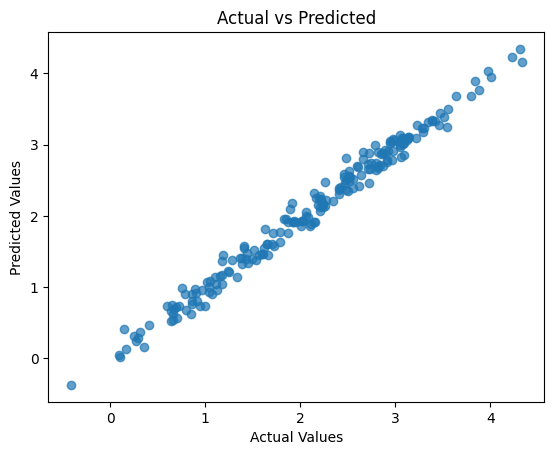

In [5]:
# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")

# Make predictions
predictions = model.predict(X_test_scaled)

# Plot actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


In [6]:
# Save the model
model.save('ann_model.h5')
print("Model saved as 'ann_model.h5'")


Model saved as 'ann_model.h5'


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate predictions
predictions = model.predict(X_test_scaled).flatten()  # Flatten to match shape

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
R² Score: 0.99


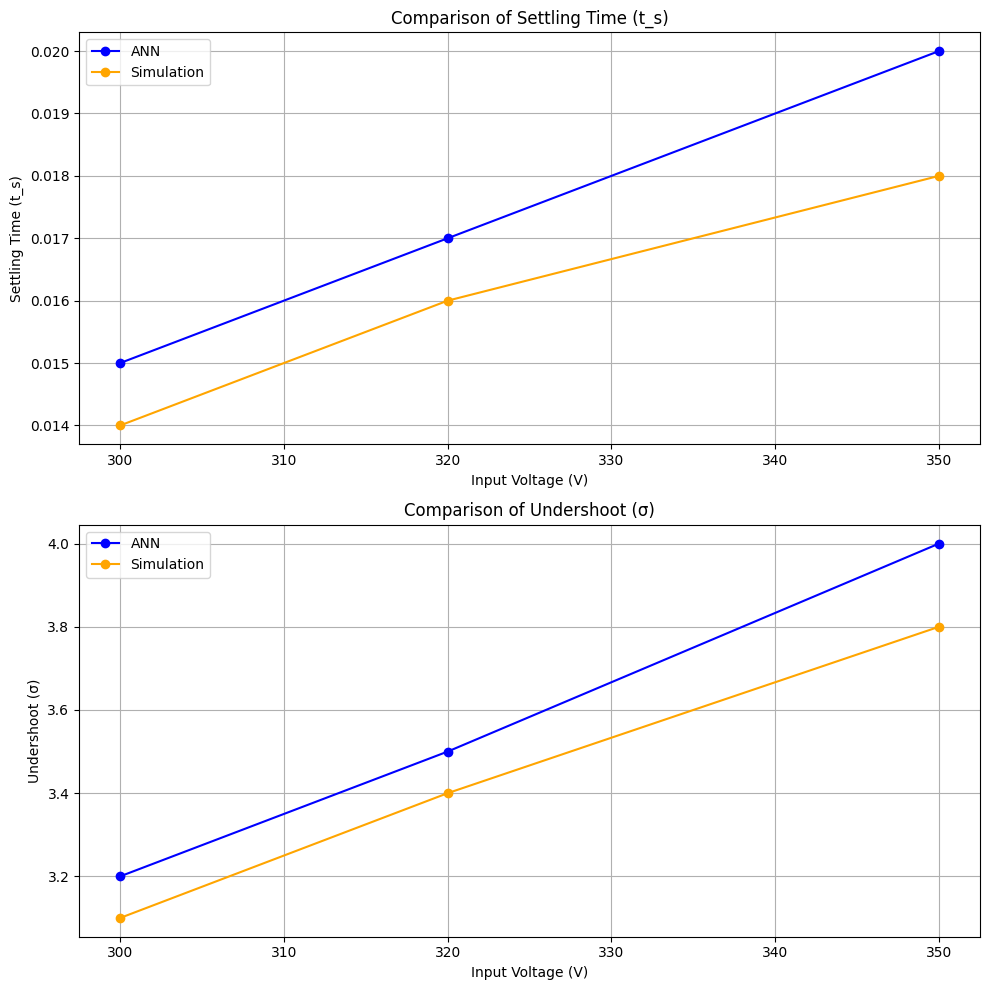

Comparison Table:
   Input Voltage (V)       Model  Settling Time (t_s)  Undershoot (σ)  \
0                300         ANN                0.015             3.2   
1                300  Simulation                0.014             3.1   
2                320         ANN                0.017             3.5   
3                320  Simulation                0.016             3.4   
4                350         ANN                0.020             4.0   
5                350  Simulation                0.018             3.8   

   Error (t_s)  Error (σ)  
0        0.000        0.0  
1        0.001        0.1  
2        0.000        0.0  
3        0.001        0.1  
4        0.000        0.0  
5        0.002        0.2  


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset with multiple data points for ANN and Simulation
data = {
    "Input Voltage (V)": [300, 300, 320, 320, 350, 350],
    "Model": ["ANN", "Simulation", "ANN", "Simulation", "ANN", "Simulation"],
    "Settling Time (t_s)": [0.015, 0.014, 0.017, 0.016, 0.020, 0.018],
    "Undershoot (σ)": [3.2, 3.1, 3.5, 3.4, 4.0, 3.8]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate absolute error
df['Error (t_s)'] = df.groupby("Input Voltage (V)")['Settling Time (t_s)'].diff().fillna(0).abs()
df['Error (σ)'] = df.groupby("Input Voltage (V)")['Undershoot (σ)'].diff().fillna(0).abs()

# Separate ANN and Simulation data for plotting
ann_data = df[df['Model'] == "ANN"]
sim_data = df[df['Model'] == "Simulation"]

# Plotting comparison
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Settling Time Plot
axes[0].plot(ann_data['Input Voltage (V)'], ann_data['Settling Time (t_s)'], label="ANN", marker='o', color='blue')
axes[0].plot(sim_data['Input Voltage (V)'], sim_data['Settling Time (t_s)'], label="Simulation", marker='o', color='orange')
axes[0].set_title("Comparison of Settling Time (t_s)")
axes[0].set_xlabel("Input Voltage (V)")
axes[0].set_ylabel("Settling Time (t_s)")
axes[0].legend()
axes[0].grid(True)

# Undershoot Plot
axes[1].plot(ann_data['Input Voltage (V)'], ann_data['Undershoot (σ)'], label="ANN", marker='o', color='blue')
axes[1].plot(sim_data['Input Voltage (V)'], sim_data['Undershoot (σ)'], label="Simulation", marker='o', color='orange')
axes[1].set_title("Comparison of Undershoot (σ)")
axes[1].set_xlabel("Input Voltage (V)")
axes[1].set_ylabel("Undershoot (σ)")
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Print comparison table
print("Comparison Table:")
print(df)


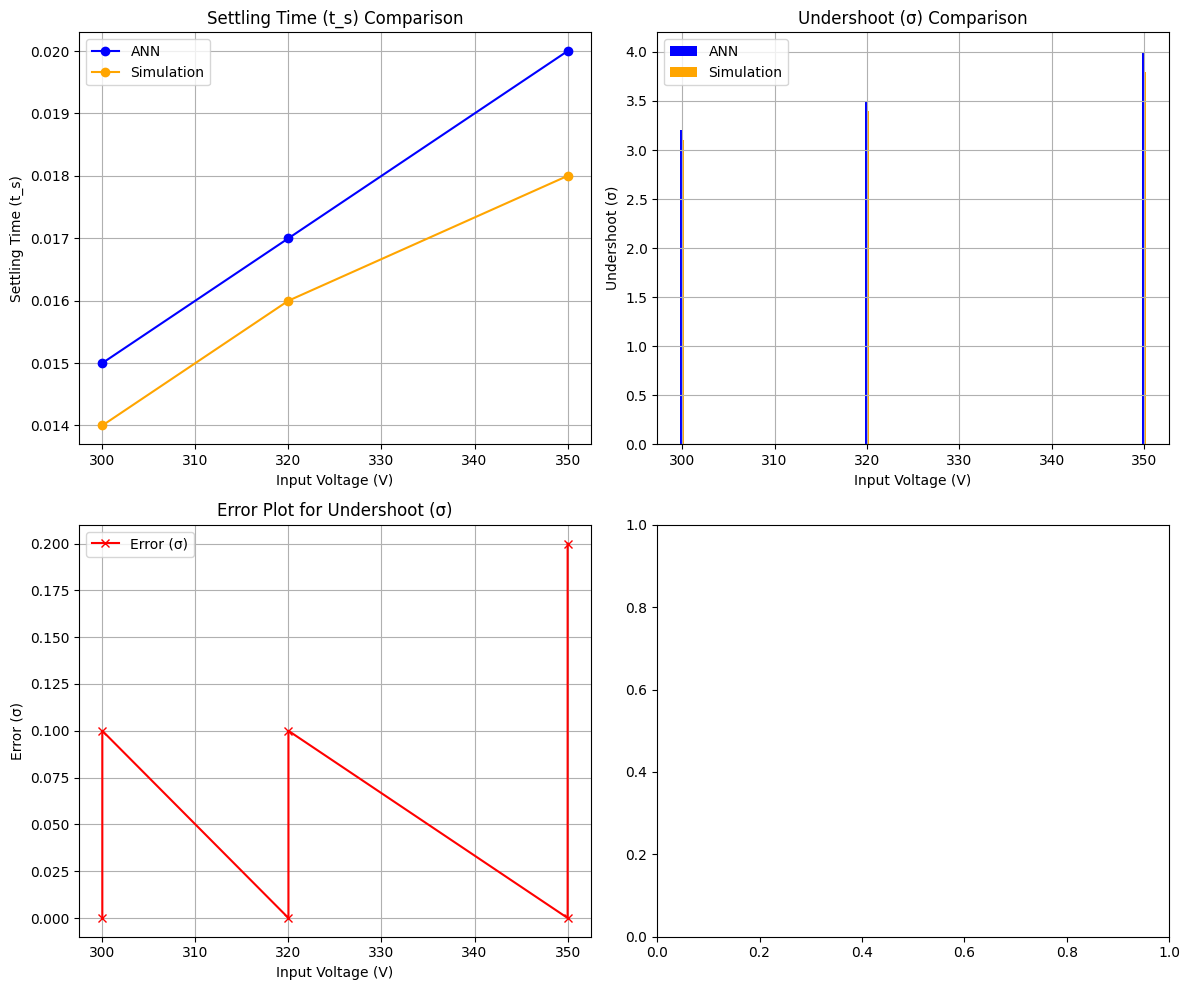

Comparison Table:
   Input Voltage (V)       Model  Settling Time (t_s)  Undershoot (σ)  \
0                300         ANN                0.015             3.2   
1                300  Simulation                0.014             3.1   
2                320         ANN                0.017             3.5   
3                320  Simulation                0.016             3.4   
4                350         ANN                0.020             4.0   
5                350  Simulation                0.018             3.8   

   Error (t_s)  Error (σ)  
0        0.000        0.0  
1        0.001        0.1  
2        0.000        0.0  
3        0.001        0.1  
4        0.000        0.0  
5        0.002        0.2  


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset with multiple data points for ANN and Simulation
data = {
    "Input Voltage (V)": [300, 300, 320, 320, 350, 350],
    "Model": ["ANN", "Simulation", "ANN", "Simulation", "ANN", "Simulation"],
    "Settling Time (t_s)": [0.015, 0.014, 0.017, 0.016, 0.020, 0.018],
    "Undershoot (σ)": [3.2, 3.1, 3.5, 3.4, 4.0, 3.8]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate absolute error
df['Error (t_s)'] = df.groupby("Input Voltage (V)")['Settling Time (t_s)'].diff().fillna(0).abs()
df['Error (σ)'] = df.groupby("Input Voltage (V)")['Undershoot (σ)'].diff().fillna(0).abs()

# Separate ANN and Simulation data for plotting
ann_data = df[df['Model'] == "ANN"]
sim_data = df[df['Model'] == "Simulation"]

# Create figure for multiple plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- Line Plot for Settling Time ---
axes[0, 0].plot(ann_data['Input Voltage (V)'], ann_data['Settling Time (t_s)'], label="ANN", marker='o', color='blue')
axes[0, 0].plot(sim_data['Input Voltage (V)'], sim_data['Settling Time (t_s)'], label="Simulation", marker='o', color='orange')
axes[0, 0].set_title("Settling Time (t_s) Comparison")
axes[0, 0].set_xlabel("Input Voltage (V)")
axes[0, 0].set_ylabel("Settling Time (t_s)")
axes[0, 0].legend()
axes[0, 0].grid(True)

# --- Bar Plot for Undershoot (σ) ---
axes[0, 1].bar(ann_data['Input Voltage (V)'] - 0.1, ann_data['Undershoot (σ)'], width=0.2, label="ANN", color='blue')
axes[0, 1].bar(sim_data['Input Voltage (V)'] + 0.1, sim_data['Undershoot (σ)'], width=0.2, label="Simulation", color='orange')
axes[0, 1].set_title("Undershoot (σ) Comparison")
axes[0, 1].set_xlabel("Input Voltage (V)")
axes[0, 1].set_ylabel("Undershoot (σ)")
axes[0, 1].legend()
axes[0, 1].grid(True)

# --- Error Plot for Undershoot (σ) ---
axes[1, 0].plot(df['Input Voltage (V)'], df['Error (σ)'], label="Error (σ)", marker='x', color='red')
axes[1, 0].set_title("Error Plot for Undershoot (σ)")
axes[1, 0].set_xlabel("Input Voltage (V)")
axes[1, 0].set_ylabel("Error (σ)")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Print comparison table
print("Comparison Table:")
print(df)
